##### Import

In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/000 Spring 2022/ML/ML_FinalProject

In [ ]:
#System imports
import sys
import glob
import os
import subprocess
import shutil
import datetime
from functools import reduce

#Data manipulation imports
import pandas as pd
import numpy as np
import math
import re
import itertools

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

# Exploratory Data Analysis

##### Read dataset

In [ ]:
df = pd.read_csv('data/raw/1721_devcode_ton_cont_month.csv')
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m')

## Basic Statistics

In [ ]:
df_short = df[df.ton !=0]

In [ ]:
NumOfSite = len(pd.unique(df_short.name_code))
NumOfMonth = len(pd.unique(df_short.time))
NumOfRecord = len(df_short)

print('Total Records:', NumOfRecord)
print('Total Periods:', NumOfMonth)
print('Total Sites:', NumOfSite)
print('Missing Records:', NumOfSite*NumOfMonth - NumOfRecord)

Total Records: 7231
Total Periods: 57
Total Sites: 131
Missing Records: 236


#### Missing Info

In [ ]:
myList = []

for i in pd.unique(df_short.time):
  for j in pd.unique(df_short.name_code):
    myList.append([j, i])

df_full = pd.DataFrame(myList, columns=['name_code','time'])

df_full = df_full.merge(df_short[['name_code', 'time', 'ton']], on = ['name_code', 'time'],how = 'left')
df_full = df_full.fillna(0)
#df_full.head()

,name_code,time,ton
0,adams,2018-04-01,85.76
1,albany,2018-04-01,92.54
2,amsterdam,2018-04-01,72.18
3,astoria,2018-04-01,74.46
4,atlanticterminal,2018-04-01,14.59


In [ ]:
df_missing = df_full[df_full['ton']==0]
df_missing['time'] = pd.to_datetime(df_missing['time'])

In [ ]:
NumOfSite = len(pd.unique(df_missing.name_code))
NumOfMonth = len(pd.unique(df_missing.time))
NumOfRecord = len(df_missing)

print('Total Records:', NumOfRecord)
print('Missing Periods:', NumOfMonth)
print('Missing Sites:', NumOfSite)

Total Records: 236
Missing Periods: 56
Missing Sites: 23


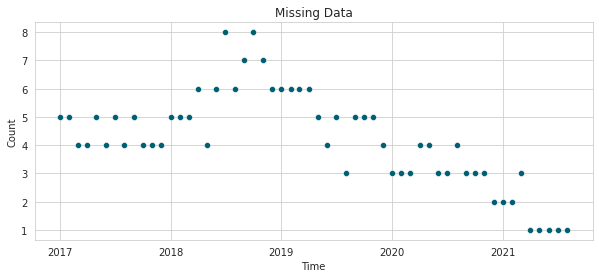

In [ ]:
df_plot = df_missing.groupby('time').agg({'name_code':'count'}).reset_index()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,4))

sns.scatterplot(data =df_plot, x = 'time', y='name_code', marker = 'o', label = 'Count',legend=False, color = '#005F73')
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.set_title('Missing Data')

fig.savefig('output/MissingData.png',bbox_inches='tight', dpi = 480)

## Distribution

### Distribution of Monthly Waste Data

In [ ]:
df_full = pd.read_csv('/gdrive/MyDrive/000 Spring 2022/Thesis Capstone/Data/Interim/fulldata_impute.csv')

In [ ]:
df_plot = df_full[['dsny_namecode', 'year','ton']]
#df_5Y = df_5Y[df_5Y.year <'2020'] # 2017, 18, 19
df_plot = df_plot[df_plot.ton !=0]
df_plot = df_plot.groupby(['dsny_namecode']).mean().reset_index()
#df_5Y['lbs_per_capita_per_day'] = df_5Y.ton / df_5Y.population_total / 30 *2000
#df_5Y['SD'] = df_5Y['SD'].astype(str)

df_plot.head()

,dsny_namecode,year,ton
0,adams,2018.964912,91.205263
1,albany,2018.964912,105.199298
2,amsterdam,2018.964912,89.784386
3,astoria,2018.964912,111.361754
4,atlanticterminal,2018.964912,24.979649


In [ ]:
fig = px.box(df_plot, x="ton", #y="rolling_ton",
	         #size="lbs_per_capita_per_day", #color="SD",
                 hover_name="dsny_namecode",title="Average Monthly Waste")# log_x=True, size_max=60)

fig.update_layout(height = 220, width = 1200, template = 'plotly_white', xaxis_title="Ton",title_x=0.5)
fig.update_traces(marker=dict(color='#005F73'))
fig.show()
fig.savefig('/gdrive/MyDrive/000 Spring 2022/Thesis Capstone/Data/image/DailyPerCapita.png', bbox_inches='tight', dpi = 480)

### Distribution of Per Capita Waste Data

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_5Y = df_full[['dsny_namecode', 'year','ton','units_total', 'population_total', 'SD','residential_buildings', 'non-residential_buildings', 'stairhalls',
       'total_sqft', 'acres', 'net_dev_sqft', 'acres_nopark','bldg_coverage_sqft',  'cubage_cuft']]
#df_5Y = df_5Y[df_5Y.year <'2020'] # 2017, 18, 19
df_5Y = df_5Y[df_5Y.ton !=0]
df_5Y = df_5Y.groupby(['dsny_namecode']).mean().reset_index()
df_5Y['lbs_per_capita_per_day'] = df_5Y.ton / df_5Y.population_total / 30 *2000
#df_5Y['SD'] = df_5Y['SD'].astype(str)

df_5Y.head()

,dsny_namecode,year,ton,units_total,population_total,SD,residential_buildings,non-residential_buildings,stairhalls,total_sqft,acres,net_dev_sqft,acres_nopark,bldg_coverage_sqft,cubage_cuft,lbs_per_capita_per_day
0,adams,2018.964912,91.205263,925.0,2302.614035,0.0,7.0,0.0,7.0,408888.0,9.39,383068.0,8.834211,56283.0,8181502.0,2.640630
1,albany,2018.964912,105.199298,1229.0,2859.982456,0.0,9.0,0.0,9.0,602983.0,13.85,602983.0,13.881579,84508.0,10332319.0,2.452213
2,amsterdam,2018.964912,89.784386,1259.0,2588.070175,0.0,14.0,0.0,25.0,482326.0,11.07,449688.0,10.252632,117920.0,10058897.0,2.312776
3,astoria,2018.964912,111.361754,1104.0,3008.263158,0.0,22.0,1.0,22.0,1406832.0,32.30,1151484.0,26.339474,173434.0,10826559.0,2.467908
4,atlanticterminal,2018.964912,24.979649,300.0,582.877193,0.0,1.0,0.0,1.0,88155.0,2.02,88155.0,2.015789,15382.0,2464800.0,2.857051


In [ ]:
fig = px.box(df_5Y, x="lbs_per_capita_per_day", #y="rolling_ton",
	         #size="lbs_per_capita_per_day", #color="SD",
                 hover_name="dsny_namecode",title="Average Daily Per Capita Waste")# log_x=True, size_max=60)

fig.update_layout(height = 220, width = 1200, template = 'plotly_white', xaxis_title="Pounds",title_x=0.5)
fig.update_traces(marker=dict(color='#005F73'))
fig.show()
#fig.savefig('/gdrive/MyDrive/000 Spring 2022/Thesis Capstone/Data/image/DailyPerCapita.png', bbox_inches='tight', dpi = 480)

## Trend and Seasonality



#### Trend Plot

##### Read City Data

In [ ]:
from urllib.parse import urlencode

In [ ]:
API = 'https://data.cityofnewyork.us/resource/ebb7-mvp5.csv?'

In [ ]:
query1 = {'$select': 'month, sum(refusetonscollected), sum(papertonscollected), sum(mgptonscollected)',
         '$where': 'month>="2016/12" and month<"2021/12"', 
          '$group':'month',
         '$limit': 100000} # if you don't specify 'limit', it returns 1000 rows as default

df1 = pd.read_csv(API + urlencode(query1))
                 #parse_dates = ['created_date'],
                 #dtype = {'incident_zip':'str'})
df1.head()

,month,sum_refusetonscollected,sum_papertonscollected,sum_mgptonscollected
0,2017 / 01,200588.28,25847.48,23861.27
1,2017 / 02,175573.56,20667.36,20194.37
2,2017 / 03,197762.03,23813.84,22777.22
3,2017 / 04,204198.92,23705.59,23188.16
4,2017 / 05,231240.96,25293.19,24744.51


In [ ]:
df1['month'] = pd.to_datetime(df1['month'])
df1['city'] = df1.sum_refusetonscollected + df1.sum_papertonscollected + df1.sum_mgptonscollected

In [ ]:
df1['city'] = df1['city']/1000 

##### Aggregate consolidation data

In [ ]:
df_trend = df[df.ton !=0].reset_index(drop = True)

In [ ]:
df_trend = df_trend.groupby(df_trend.time).agg(cont = ('cont', 'sum'), 
                                                   ton = ('ton', 'sum')).reset_index()

In [ ]:
#df_trend['time'] = df_trend.year.astype(str) +'-'+ pd.to_datetime(df_trend.month, format='%B').dt.month.astype(str)
#df_trend['time'] = pd.to_datetime(df_trend['time'], format = '%Y-%m')

In [ ]:
df_trend = df_trend.sort_values(by = 'time')

In [ ]:
df_trend['ton_rolling'] = df_trend.ton.rolling(3).mean().shift(-1)

In [ ]:
df_trend = df_trend.merge(df1, left_on = 'time', right_on = 'month')
df_trend.head()

,time,cont,ton,ton_rolling,month,sum_refusetonscollected,sum_papertonscollected,sum_mgptonscollected,city
0,2017-01-01,1798.0,12553.885,NaN,2017-01-01,200588.28,25847.48,23861.27,250.29703
1,2017-02-01,1453.0,9841.921,11419.842000,2017-02-01,175573.56,20667.36,20194.37,216.43529
2,2017-03-01,1749.0,11863.720,10836.767000,2017-03-01,197762.03,23813.84,22777.22,244.35309
3,2017-04-01,1539.0,10804.660,11544.496667,2017-04-01,204198.92,23705.59,23188.16,251.09267
4,2017-05-01,1676.0,11965.110,11392.220000,2017-05-01,231240.96,25293.19,24744.51,281.27866


##### Lineplot

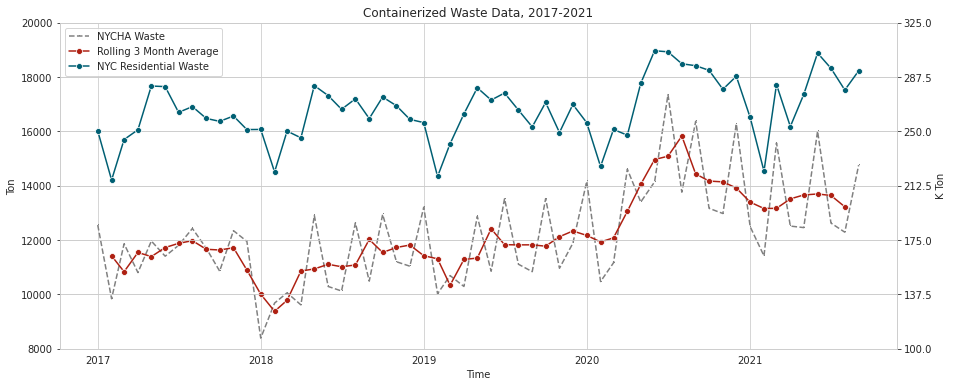

In [ ]:
#df_plot = df_trend[df_trend['Year']!=2021]
#df_plot['Time'] = df_plot['Time'].apply(lambda d: pd.to_datetime(str(d)))

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,6))
ax2 = ax.twinx()

sns.lineplot(data = df_trend, x = 'time', y='ton', ax = ax, marker = ',', color = 'grey', linestyle='--', label = 'NYCHA Waste')
sns.lineplot(data = df_trend, x = 'time', y='ton_rolling',ax = ax, marker = 'o',color='#AE2012', label = 'Rolling 3 Month Average')
sns.lineplot(data = df_trend, x="time", y="city", ax=ax2, marker = 'o', color="#005F73", label = 'NYC Residential Waste', legend = False).set(title='Containerized Waste Data, 2017-2021')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2)

ax.set_xlabel('Time')
#ax.set_xlim(2017, 2022)
ax.set_ylabel('Ton')
ax.set_ylim(8000, 20000)

ax2.set_ylim(100, 320)
ax2.set_ylabel('K Ton')

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
#plt.title('Average Tonnage, All NYCHA Development')
#plt.xticks(rotation=90)

fig.savefig('/gdrive/MyDrive/001 Fall 2021/Thesis Capstone/Data/image/trend.png', dpi = 480)

#### Seasonal Decomposition

In [ ]:
df = pd.read_csv('data/raw/1721_devcode_ton_cont_month.csv')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_month_ave = pd.concat([df[df.year != 2021], df[(df.ton !=0)&(df.year == 2021)]])
df_month_ave = df_month_ave.groupby('time').agg({'ton':'sum'}).reset_index()
df_month_ave['time'] = pd.to_datetime(df_month_ave['time'])
df_month_ave['rolling_ton'] = df_month_ave['ton'].rolling(3).mean().shift(-1).reset_index()['ton']
df_month_ave = df_month_ave.dropna()
df_month_ave = df_month_ave.set_index('time')

In [ ]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df_month_ave['rolling_ton'], model='multiplicative', extrapolate_trend='freq')
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['Seasonality', 'Trend', 'Residual', 'Observed']

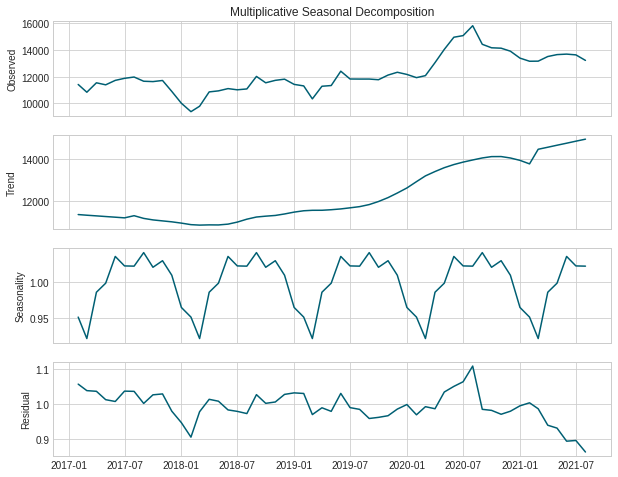

In [ ]:
plt.style.use('seaborn-whitegrid')
#fig = plt.figure(figsize = (10,16))
fig, axs = plt.subplots(figsize = (10,8), nrows = 4, ncols = 1, sharex= True)
axs[0].plot(df_reconstructed.index, df_reconstructed.Observed, color = '#005F73')
axs[1].plot(df_reconstructed.index, df_reconstructed.Trend, color = '#005F73')
axs[2].plot(df_reconstructed.index, df_reconstructed.Seasonality, color = '#005F73')
axs[3].plot(df_reconstructed.index, df_reconstructed.Residual, color = '#005F73')

axs[0].set_ylabel('Observed')
axs[1].set_ylabel('Trend')
axs[2].set_ylabel('Seasonality')
axs[3].set_ylabel('Residual')
#plt.ylim(0.8, 1.2)
axs[0].set_title('Multiplicative Seasonal Decomposition')
#plt.grid()
fig.savefig('output/SeasonalityDecomposition.png',bbox_inches='tight', dpi = 480)

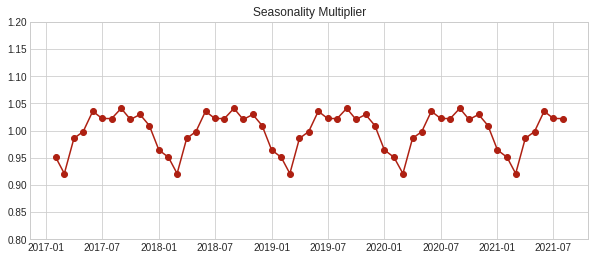

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (10,4))

plt.plot(df_reconstructed.index, df_reconstructed.Seasonality, marker = 'o', color = '#AE2012')
plt.ylim(0.8, 1.2)
plt.title('Seasonality Multiplier')
#plt.grid()
fig.savefig('output/SeasonalityMultiplier.png',bbox_inches='tight', dpi = 480)

## Correlation Heatmap

In [ ]:
cor = df_full[['rolling_ton','SD', 'units_total', 'number_rental_rooms', 'population_total',
'total_sqft', 'net_dev_sqft', 'nondev_sqft',  'cubage_cuft', 'park_acres',
'residential_buildings', 'stairhalls',
'ave_height', 'ave_bldg_sqft',
'development_cost', 'cost_per_rental_room_ab', 
'families_on_fixed_income', 
'ave_r_per_unit', 
'density_PopPerDevFt', 'density_PopPerCubage',
'bldg_land_ratio', 'avg_m_gross_rent',
'pct_families_on_fixed_income',
'rec_bins', 'per_unit_rb', 'per_capita_rb', 
'Avg Temperature', 
'Precipitation','HeavyPre',  
'Snowdepth','Snow',
'C1', 'C2', 'C3', 'C4', 
'month',
'pandemic',
]].corr()

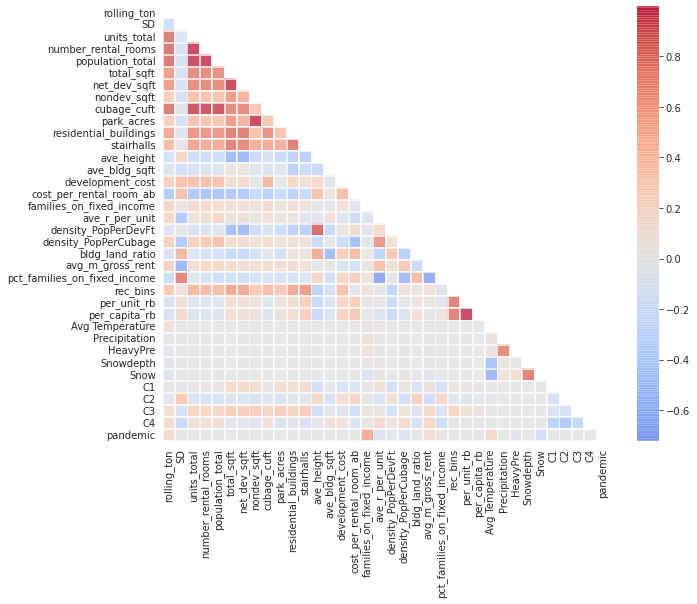

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # Mark 'true' for the upper-triangle 

sns.heatmap(cor, cmap = 'coolwarm', linewidth=1, alpha=0.7, mask=mask,ax=ax, center = 0)

fig.savefig('output/Heatmap_allVar.png', bbox_inches='tight', dpi = 480)